In [178]:
import numpy as np
import torchvision.models as models
import torch
import matplotlib.pyplot as plt
import cv2
from torchvision.models.segmentation import lraspp_mobilenet_v3_large
from ipywidgets import interact

In [188]:
model = deeplabv3_resnet101(pretrained=True)
model = model.eval()
help(lraspp_mobilenet_v3_large)

Help on function lraspp_mobilenet_v3_large in module torchvision.models.segmentation.segmentation:

lraspp_mobilenet_v3_large(pretrained: bool = False, progress: bool = True, num_classes: int = 21, **kwargs: Any) -> torch.nn.modules.module.Module
    Constructs a Lite R-ASPP Network model with a MobileNetV3-Large backbone.
    
    Args:
        pretrained (bool): If True, returns a model pre-trained on COCO train2017 which
            contains the same classes as Pascal VOC
        progress (bool): If True, displays a progress bar of the download to stderr
        num_classes (int): number of output classes of the model (including the background)



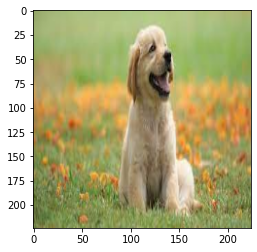

In [189]:
# run the model with quantized inputs and weights
image = cv2.imread("/home/joris/Downloads/dog.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
plt.imshow(image)
image_t = torch.tensor(image.reshape(1, 3, 224, 224))
#plt.imshow(image_t)
#print(type(image_t))

out = model(image_t.to(torch.float32))
#plt.imshow(out.reshape(10, 100))

In [182]:
%matplotlib inline
#out = out['out']
m = torch.nn.functional.softmax(out, dim = 1)
def show(i):
    plt.imshow((m.detach().numpy()[0, i, :, :]))
    plt.show()
    
interact(show, i=range(0, 21))
print(m.shape)

interactive(children=(Dropdown(description='i', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

torch.Size([1, 21, 224, 224])


In [89]:
print(out['out'].shape)

torch.Size([1, 21, 224, 224])


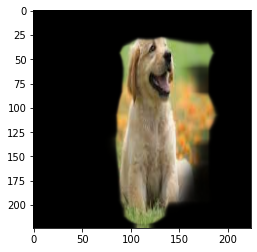

In [190]:
mask = m.detach().numpy()[0, 15, :, :]
image[:, :, 0] = image[:, :, 0]*mask
image[:, :, 1] = image[:, :, 1]*mask
image[:, :, 2] = image[:, :, 2]*mask
plt.imshow(image)